# Superposition in space

IHE, transient groundwater

Olsthoorn, 2019-01-02

The 1D aquifer has a limited width equal to $L$. The head at $x=0$ changes suddenly at $t=0$ by the value $a$, while the head at $x=L$ remains fixed.

The solution for an infinite aquifer with sudden head change at $x=0$ reads

$$ s(x, t) = s(x, 0) \, \mathtt{erfc} \left(\sqrt{\frac {x^2 S} {4 kD t}} \right) $$

To keep the head at $x=L$ fixed, we have to mirror the sudden head change by a negative change of the same magnitude, $-a$, at $x=2L$. This disturbance will, however, cause the head at $x=0$ to change. It, therefore, requires a sudden head change equal to $a$ at $x=-2L$ etc. This way, an infinite number of head changes needs to be superimposed. To the right, they all have magnitude $-a$, and to the left they all have magnitude $+a$.

This superposition can, therefore, be written as

$$ s(x, t) = a \, \mathtt{erfc}\sqrt{\frac {x^2 S} {4 kD t}}+ a \sum _1 ^\infty \left\{\,
 \mathtt{erfc} \left((2 i L + x)\sqrt{\frac S {4 kD t}} \right) -
 \mathtt{erfc} \left((2 i L -x) \sqrt{\frac S {4 kD t}} \right) \right\} $$

Note that, when $x$ was chosen at $x=L$, the superposition would be symmetrical at $x=0$. The solution could then be written as

$$ s(x, t) = a \sum _1 ^\infty  \mathtt{erfc} \left(((2 i - 1) L + x) \sqrt{\frac S {4 kD t}} \right) 
-
\mathtt{erfc} \left( \left((2 i - 1) L - x \right) \sqrt{\frac S {4 kD t}} \right) $$

But then, $x=0$ would be at the right end of the strip of land instead of on the left end.

Let's implement both expressions. We can do so in two graphs for ease of inspection.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc

## Strip with $x=0$ at left, $0 < x < L$

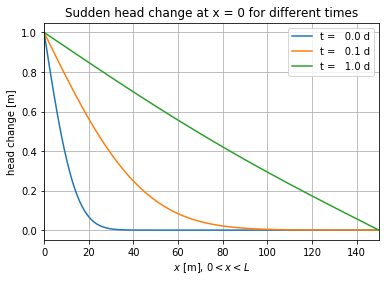

In [14]:
L = 150 # m (strip wirdth)
x = np.linspace(0, L, 201) # points, taking left at zero.
kD = 600 # m2/d
S = 0.1 # [-]
a = 1.0 # m, sudden head change
times = [0.01, 0.1, 1.0] # d

plt.title('Sudden head change at x = 0 for different times')
plt.xlabel('$x$ [m], $ 0 < x < L $')
plt.ylabel('head change [m]')
plt.xlim((0, L))
plt.grid()
for t in times:
    rt = np.sqrt(S / (4 * kD * t))
    s = a * erfc(x * rt)
    for i in range(1, 20):
        s += a * (erfc((2 * i * L + x) * rt) - erfc((2 * i * L - x) * rt))
    plt.plot(x, s, label='t = {:5.1f} d'.format(t))
plt.legend()
plt.show()
        


## Strip, $-L < x < 0$, with $x=0$ at right

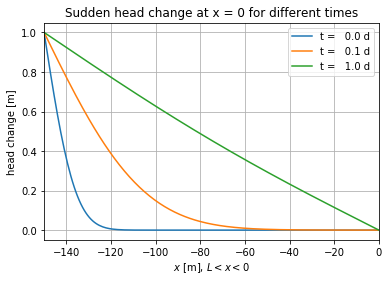

In [16]:
L = 150 # m (strip wirdth)
x = np.linspace(-L, 0, 201) # points, taking left at zero.
kD = 600 # m2/d
S = 0.1 # [-]
a = 1.0 # m, sudden head change
times = [0.01, 0.1, 1.0] # d

plt.title('Sudden head change at x = 0 for different times')
plt.xlabel('$x$ [m], $ L < x < 0 $')
plt.ylabel('head change [m]')
plt.xlim((-L, 0))
plt.grid()
for t in times:
    rt = np.sqrt(S / (4 * kD * t))
    s = np.zeros_like(x)
    for i in range(1, 20):
        s += a * (erfc(((2 * i - 1) * L + x) * rt) - erfc(((2 * i - 1) * L - x) * rt))
    plt.plot(x, s, label='t = {:5.1f} d'.format(t))
plt.legend()
plt.show()
        
